In [26]:
import pandas as pd
import sklearn as sk
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize 
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score,plot_confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
pwd

'/Users/waleedzafar/Downloads'

In [176]:
train = pd.read_csv('../Downloads/star_classifier/data/exoTrain.csv')

In [4]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [177]:
test = pd.read_csv('../Downloads/star_classifier/data/exoTest.csv')

In [6]:
test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [7]:
train.shape

(5087, 3198)

In [8]:
test.shape

(570, 3198)

In [9]:
train.LABEL.value_counts() # 1 represents non-exoplanet-stars and 2 represents exoplanet-stars

1    5050
2      37
Name: LABEL, dtype: int64

In [10]:
test.LABEL.value_counts()

1    565
2      5
Name: LABEL, dtype: int64

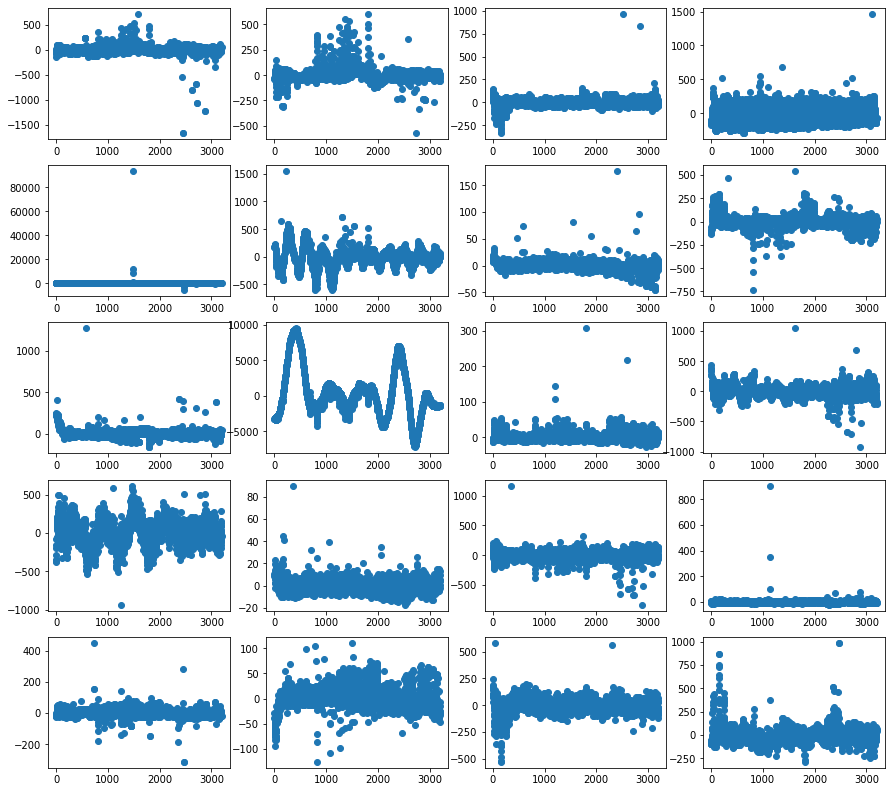

In [11]:
# visualizing non-exoplanet-stars
fig = plt.figure(figsize=(15,40))
x = np.array(range(3197))
for i in range(20):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(x,train[train.LABEL == 1].iloc[i,1:])

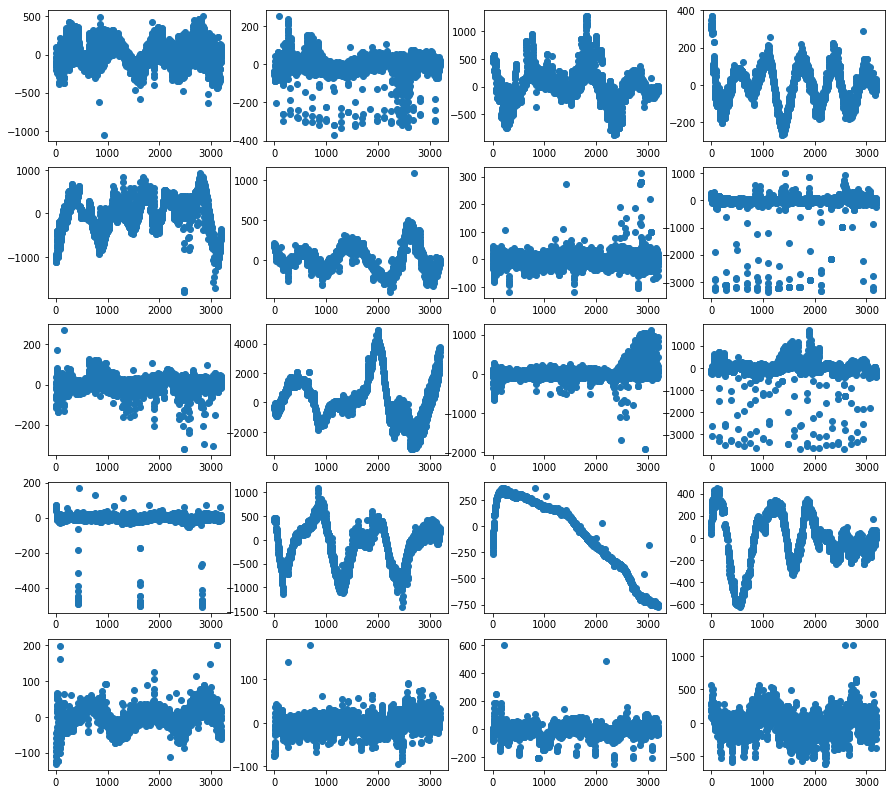

In [12]:
# visualizing exoplanet-stars: trend over time is approximately periodic and outliers are present
fig = plt.figure(figsize=(15,40))
x = np.array(range(3197))
for i in range(20):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(x,train[train.LABEL == 2].iloc[i,1:])

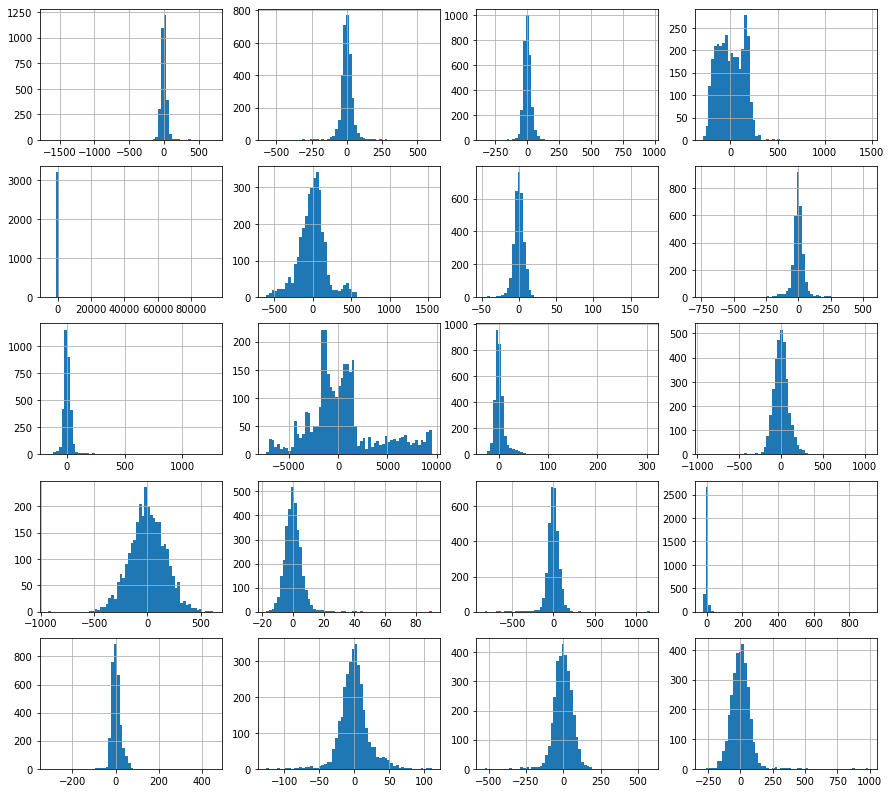

In [13]:
# visualizing flux distribution of non-exoplanet-stars: narrower distribution b/c flux values are more consistent
fig = plt.figure(figsize=(15,40))
for i in range(20):
    ax = fig.add_subplot(14,4,i+1)
    train[train.LABEL ==1].iloc[i,1:].hist(bins=60)

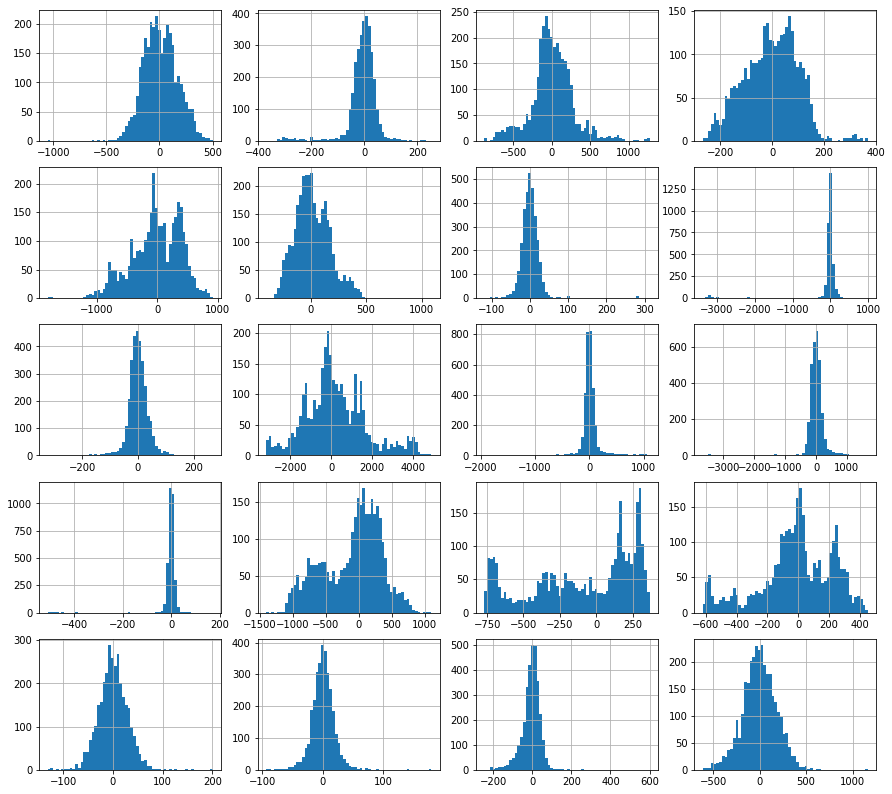

In [14]:
# visualizing flux distribution of exoplanet-stars: wider distribution b/c flux values vary more 
fig = plt.figure(figsize=(15,40))
for i in range(20):
    ax = fig.add_subplot(14,4,i+1)
    train[train.LABEL ==2].iloc[i,1:].hist(bins=60)

In [178]:
X_train = train.drop('LABEL', axis=1)
y_train = train['LABEL'].values
X_test = test.drop('LABEL', axis=1)
y_test = test['LABEL'].values

In [98]:
# baseline model without any data processing
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
preds = knn.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/Users/waleedzafar/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waleedzafar/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waleedzafar/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Another baseline model w/o any processing
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)
preds = svm.predict(X_test)
print(classification_report(y_test,preds))

In [99]:
# Another baseline model w/o any processing
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
preds = dt.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       565
           2       0.17      0.20      0.18         5

    accuracy                           0.98       570
   macro avg       0.58      0.60      0.59       570
weighted avg       0.99      0.98      0.98       570



In [100]:
# Last baseline model w/o any processing
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
preds = lgr.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.99      0.56      0.71       565
           2       0.01      0.40      0.02         5

    accuracy                           0.56       570
   macro avg       0.50      0.48      0.37       570
weighted avg       0.98      0.56      0.71       570



/Users/waleedzafar/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# some observations:
# many outliers
# highly imbalanced data - done
# noisy signal - done

In [180]:
# handling imbalanced data using smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
xTrain_new, yTrain_new = oversample.fit_resample(X_train, y_train) # new training set which will be used to train models

In [181]:
from collections import Counter
counter1 = Counter(y_train)
counter2 = Counter(yTrain_new)
print(counter1)
print(counter2)

Counter({1: 5050, 2: 37})
Counter({2: 5050, 1: 5050})


In [182]:
print(xTrain_new.shape)
print(yTrain_new.shape)

(10100, 3197)
(10100,)


              precision    recall  f1-score   support

           1       1.00      0.96      0.98       565
           2       0.11      0.60      0.18         5

    accuracy                           0.95       570
   macro avg       0.55      0.78      0.58       570
weighted avg       0.99      0.95      0.97       570



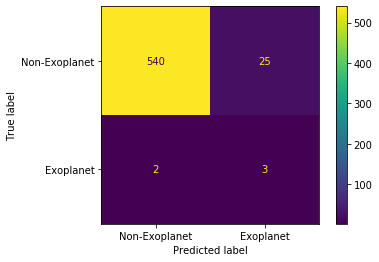

In [142]:
# knn after smote
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=44)
knn.fit(xTrain_new, yTrain_new)
preds = knn.predict(X_test)
print(classification_report(y_test,preds))
plot_confusion_matrix(knn, X_test, y_test, display_labels=['Non-Exoplanet','Exoplanet'])  
plt.show()

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



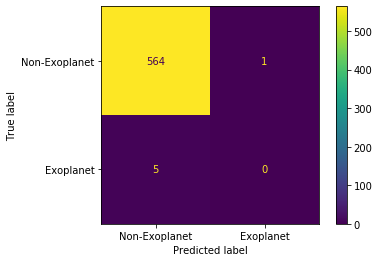

In [97]:
# svm after smote
from sklearn import svm
svm = svm.SVC()
svm.fit(xTrain_new, yTrain_new)
preds = svm.predict(X_test)
print(classification_report(y_test,preds))
plot_confusion_matrix(svm, X_test, y_test, display_labels=['Non-Exoplanet','Exoplanet'])  
plt.show()

              precision    recall  f1-score   support

           1       0.99      0.97      0.98       565
           2       0.06      0.20      0.09         5

    accuracy                           0.96       570
   macro avg       0.53      0.59      0.54       570
weighted avg       0.98      0.96      0.97       570



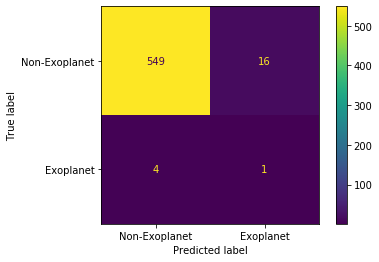

In [95]:
# dt after smote
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(xTrain_new, yTrain_new)
preds = dt.predict(X_test)
print(classification_report(y_test,preds))
plot_confusion_matrix(dt, X_test, y_test, display_labels=['Non-Exoplanet','Exoplanet'])  
plt.show()

/Users/waleedzafar/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           1       0.99      0.60      0.75       565
           2       0.01      0.60      0.03         5

    accuracy                           0.60       570
   macro avg       0.50      0.60      0.39       570
weighted avg       0.99      0.60      0.74       570



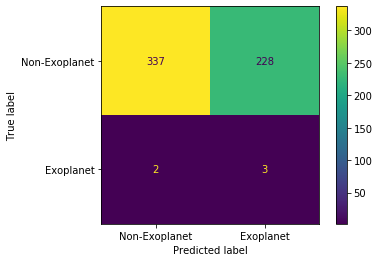

In [96]:
# logisitc regression after smote
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(xTrain_new, yTrain_new)
preds = lgr.predict(X_test)
print(classification_report(y_test,preds))
plot_confusion_matrix(lgr, X_test, y_test, display_labels=['Non-Exoplanet','Exoplanet'])  
plt.show()

## Denoising signal

In [143]:
# Trying different filtering + scaling techniques
# def savgol(df1,df2):
#     x = savgol_filter(df1,21,4,deriv=0)
#     y = savgol_filter(df2,21,4,deriv=0)
#     return x,y

# def fourier(df1,df2):
#     train_X = np.abs(np.fft.fft(df1, axis=1))
#     test_X = np.abs(np.fft.fft(df2, axis=1))
#     return train_X,test_X
from scipy.signal import savgol_filter
# train_smooth = savgol_filter(X_train,21,4,deriv=0)
# test_smooth = savgol_filter(X_test,21,4,deriv=0)
train_smooth = np.abs(np.fft.fft(X_train, axis=1))
test_smooth = np.abs(np.fft.fft(X_test, axis=1))

In [144]:
train_smooth

array([[ 31822.48      ,   3542.69725989,  55671.61280692, ...,
         52952.70195631,  55671.61280692,   3542.69725989],
       [ 23747.1       ,  18904.03483095,  23034.01375377, ...,
         23943.70167127,  23034.01375377,  18904.03483095],
       [ 26180.51      , 143610.48759074,  41912.29468855, ...,
        365999.61678651,  41912.29468855, 143610.48759074],
       ...,
       [  9398.42000001,   5514.03371502,  18216.47890902, ...,
          7032.65269996,  18216.47890902,   5514.03371502],
       [  2567.54      ,   1986.45522747,   2780.97513937, ...,
          3810.82651497,   2780.97513937,   1986.45522747],
       [ 16608.95000001,  12716.78586068,  20542.92617575, ...,
          8212.03658663,  20542.92617575,  12716.78586068]])

In [145]:
train_smooth = pd.DataFrame(train_smooth)
test_smooth = pd.DataFrame(test_smooth)

In [146]:
train

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


In [147]:
train_smooth

,0,1,2,3,4,5,6,7,8,9,...,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196
0,31822.48,3.542697e+03,5.567161e+04,5.295270e+04,2.007515e+05,2.935312e+04,2.509352e+04,1.670954e+04,2.881272e+04,2.555977e+04,...,2.992546e+03,2.555977e+04,2.881272e+04,1.670954e+04,2.509352e+04,2.935312e+04,2.007515e+05,5.295270e+04,5.567161e+04,3.542697e+03
1,23747.10,1.890403e+04,2.303401e+04,2.394370e+04,1.381956e+04,2.076509e+04,1.730365e+04,7.401036e+03,8.735502e+03,8.872865e+03,...,7.383346e+03,8.872865e+03,8.735502e+03,7.401036e+03,1.730365e+04,2.076509e+04,1.381956e+04,2.394370e+04,2.303401e+04,1.890403e+04
2,26180.51,1.436105e+05,4.191229e+04,3.659996e+05,1.040665e+05,1.895437e+05,1.233988e+05,8.315341e+04,2.257719e+04,9.991618e+04,...,4.875452e+04,9.991618e+04,2.257719e+04,8.315341e+04,1.233988e+05,1.895437e+05,1.040665e+05,3.659996e+05,4.191229e+04,1.436105e+05
3,14855.14,1.237144e+04,3.330946e+04,6.904213e+04,6.429092e+04,1.720764e+05,4.945828e+04,4.551156e+04,3.506174e+04,2.129136e+04,...,1.706083e+04,2.129136e+04,3.506174e+04,4.551156e+04,4.945828e+04,1.720764e+05,6.429092e+04,6.904213e+04,3.330946e+04,1.237144e+04
4,45527.39,3.104141e+05,1.404333e+05,4.006619e+05,4.062113e+05,2.838108e+05,3.190558e+05,7.914415e+04,9.962406e+04,1.896093e+05,...,1.345503e+04,1.896093e+05,9.962406e+04,7.914415e+04,3.190558e+05,2.838108e+05,4.062113e+05,4.006619e+05,1.404333e+05,3.104141e+05
5,57595.81,3.575662e+03,1.325133e+05,2.587547e+05,7.313369e+04,1.177065e+05,6.431562e+04,2.797218e+04,1.879975e+04,4.289185e+03,...,2.675930e+04,4.289185e+03,1.879975e+04,2.797218e+04,6.431562e+04,1.177065e+05,7.313369e+04,2.587547e+05,1.325133e+05,3.575662e+03
6,4053.12,8.641105e+03,1.199046e+04,4.394149e+03,5.700880e+03,2.894798e+03,4.878782e+03,4.880162e+03,3.001817e+03,2.167825e+03,...,1.312030e+03,2.167825e+03,3.001817e+03,4.880162e+03,4.878782e+03,2.894798e+03,5.700880e+03,4.394149e+03,1.199046e+04,8.641105e+03
7,283320.93,9.359846e+04,6.904275e+04,3.521163e+04,9.125340e+03,3.390972e+04,4.194189e+04,9.601996e+03,3.224453e+04,4.126595e+04,...,1.478737e+04,4.126595e+04,3.224453e+04,9.601996e+03,4.194189e+04,3.390972e+04,9.125340e+03,3.521163e+04,6.904275e+04,9.359846e+04
8,189.00,1.973170e+03,1.683991e+04,2.031924e+04,6.580563e+03,1.376990e+04,8.393534e+03,9.081000e+03,8.222586e+03,3.458200e+03,...,4.568901e+03,3.458200e+03,8.222586e+03,9.081000e+03,8.393534e+03,1.376990e+04,6.580563e+03,2.031924e+04,1.683991e+04,1.973170e+03
9,668543.64,5.816793e+05,2.469493e+06,8.106104e+05,9.017541e+05,1.011609e+06,8.612893e+05,6.279761e+05,3.270153e+05,3.776817e+05,...,1.075349e+05,3.776817e+05,3.270153e+05,6.279761e+05,8.612893e+05,1.011609e+06,9.017541e+05,8.106104e+05,2.469493e+06,5.816793e+05


In [148]:
train_smooth['LABEL'] = train['LABEL']
cols = list(train_smooth.columns)
cols = [cols[-1]] + cols[:-1]
train_smooth = train_smooth[cols]
train_smooth

,LABEL,0,1,2,3,4,5,6,7,8,...,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196
0,2,31822.48,3.542697e+03,5.567161e+04,5.295270e+04,2.007515e+05,2.935312e+04,2.509352e+04,1.670954e+04,2.881272e+04,...,2.992546e+03,2.555977e+04,2.881272e+04,1.670954e+04,2.509352e+04,2.935312e+04,2.007515e+05,5.295270e+04,5.567161e+04,3.542697e+03
1,2,23747.10,1.890403e+04,2.303401e+04,2.394370e+04,1.381956e+04,2.076509e+04,1.730365e+04,7.401036e+03,8.735502e+03,...,7.383346e+03,8.872865e+03,8.735502e+03,7.401036e+03,1.730365e+04,2.076509e+04,1.381956e+04,2.394370e+04,2.303401e+04,1.890403e+04
2,2,26180.51,1.436105e+05,4.191229e+04,3.659996e+05,1.040665e+05,1.895437e+05,1.233988e+05,8.315341e+04,2.257719e+04,...,4.875452e+04,9.991618e+04,2.257719e+04,8.315341e+04,1.233988e+05,1.895437e+05,1.040665e+05,3.659996e+05,4.191229e+04,1.436105e+05
3,2,14855.14,1.237144e+04,3.330946e+04,6.904213e+04,6.429092e+04,1.720764e+05,4.945828e+04,4.551156e+04,3.506174e+04,...,1.706083e+04,2.129136e+04,3.506174e+04,4.551156e+04,4.945828e+04,1.720764e+05,6.429092e+04,6.904213e+04,3.330946e+04,1.237144e+04
4,2,45527.39,3.104141e+05,1.404333e+05,4.006619e+05,4.062113e+05,2.838108e+05,3.190558e+05,7.914415e+04,9.962406e+04,...,1.345503e+04,1.896093e+05,9.962406e+04,7.914415e+04,3.190558e+05,2.838108e+05,4.062113e+05,4.006619e+05,1.404333e+05,3.104141e+05
5,2,57595.81,3.575662e+03,1.325133e+05,2.587547e+05,7.313369e+04,1.177065e+05,6.431562e+04,2.797218e+04,1.879975e+04,...,2.675930e+04,4.289185e+03,1.879975e+04,2.797218e+04,6.431562e+04,1.177065e+05,7.313369e+04,2.587547e+05,1.325133e+05,3.575662e+03
6,2,4053.12,8.641105e+03,1.199046e+04,4.394149e+03,5.700880e+03,2.894798e+03,4.878782e+03,4.880162e+03,3.001817e+03,...,1.312030e+03,2.167825e+03,3.001817e+03,4.880162e+03,4.878782e+03,2.894798e+03,5.700880e+03,4.394149e+03,1.199046e+04,8.641105e+03
7,2,283320.93,9.359846e+04,6.904275e+04,3.521163e+04,9.125340e+03,3.390972e+04,4.194189e+04,9.601996e+03,3.224453e+04,...,1.478737e+04,4.126595e+04,3.224453e+04,9.601996e+03,4.194189e+04,3.390972e+04,9.125340e+03,3.521163e+04,6.904275e+04,9.359846e+04
8,2,189.00,1.973170e+03,1.683991e+04,2.031924e+04,6.580563e+03,1.376990e+04,8.393534e+03,9.081000e+03,8.222586e+03,...,4.568901e+03,3.458200e+03,8.222586e+03,9.081000e+03,8.393534e+03,1.376990e+04,6.580563e+03,2.031924e+04,1.683991e+04,1.973170e+03
9,2,668543.64,5.816793e+05,2.469493e+06,8.106104e+05,9.017541e+05,1.011609e+06,8.612893e+05,6.279761e+05,3.270153e+05,...,1.075349e+05,3.776817e+05,3.270153e+05,6.279761e+05,8.612893e+05,1.011609e+06,9.017541e+05,8.106104e+05,2.469493e+06,5.816793e+05


In [149]:
test_smooth['LABEL'] = test['LABEL']
cols = list(test_smooth.columns)
cols = [cols[-1]] + cols[:-1]
test_smooth = test_smooth[cols]
test_smooth

,LABEL,0,1,2,3,4,5,6,7,8,...,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196
0,2,2336.44,1.010599e+04,17673.365899,7843.480229,6003.294139,7233.286852,7642.207632,3528.158697,3507.134893,...,3478.849855,4162.501513,3507.134893,3528.158697,7642.207632,7233.286852,6003.294139,7843.480229,17673.365899,1.010599e+04
1,2,305036.52,1.941835e+06,611030.236658,401110.349063,253011.570670,230486.625738,901922.049009,386620.591840,382749.490065,...,141502.465300,425318.824620,382749.490065,386620.591840,901922.049009,230486.625738,253011.570670,401110.349063,611030.236658,1.941835e+06
2,2,19294.33,1.333539e+05,34843.973448,15267.356940,15379.377836,60563.004643,31069.829077,29142.625941,18886.810358,...,10159.742301,4302.154612,18886.810358,29142.625941,31069.829077,60563.004643,15379.377836,15267.356940,34843.973448,1.333539e+05
3,2,198318.67,1.224174e+05,67392.748075,16762.498635,53518.455670,66570.114293,62249.247191,19723.361376,28755.653151,...,54697.382090,20904.330935,28755.653151,19723.361376,62249.247191,66570.114293,53518.455670,16762.498635,67392.748075,1.224174e+05
4,2,75670.79,1.622826e+04,27147.827152,29117.750443,63294.075858,90211.529159,40888.462531,68733.049795,33646.127913,...,11747.406494,19327.208402,33646.127913,68733.049795,40888.462531,90211.529159,63294.075858,29117.750443,27147.827152,1.622826e+04
5,1,1862.79,3.012835e+03,4227.828225,1527.373097,1755.722889,774.758707,827.245381,1779.576615,1044.010788,...,634.154312,563.039858,1044.010788,1779.576615,827.245381,774.758707,1755.722889,1527.373097,4227.828225,3.012835e+03
6,1,19041.24,1.798811e+04,27716.277018,9663.553386,9623.692081,9482.949915,11920.281365,3837.105781,10192.535476,...,10286.343119,11591.871031,10192.535476,3837.105781,11920.281365,9482.949915,9623.692081,9663.553386,27716.277018,1.798811e+04
7,1,2925.92,6.475151e+03,12562.980325,8581.676777,4723.205140,1975.906444,2248.639285,1398.378923,697.884392,...,2054.080960,617.395376,697.884392,1398.378923,2248.639285,1975.906444,4723.205140,8581.676777,12562.980325,6.475151e+03
8,1,20199.24,8.670732e+03,16046.643471,27741.718182,4680.073066,20486.318837,19880.740652,9661.324919,7456.601260,...,13747.836843,3457.187729,7456.601260,9661.324919,19880.740652,20486.318837,4680.073066,27741.718182,16046.643471,8.670732e+03
9,1,17915.22,2.648334e+04,36750.069768,18369.658512,42889.809895,5197.339467,15698.347568,16739.236649,13585.903764,...,21427.895279,1483.253207,13585.903764,16739.236649,15698.347568,5197.339467,42889.809895,18369.658512,36750.069768,2.648334e+04


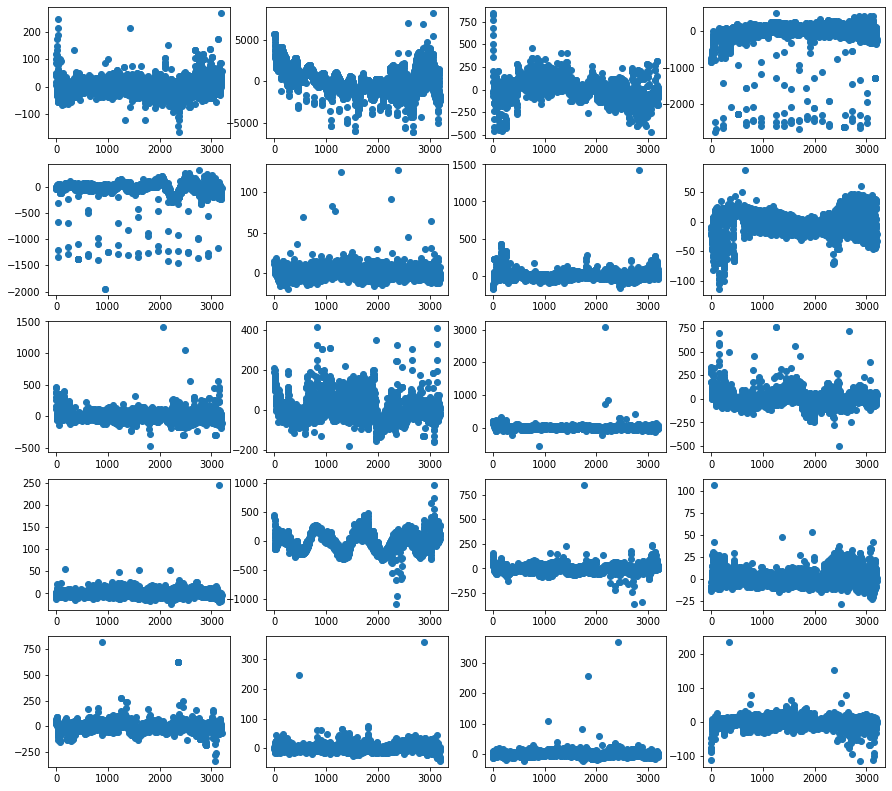

In [150]:
fig = plt.figure(figsize=(15,40))
x = np.array(range(3197))
for i in range(20):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(x,test.iloc[i,1:])

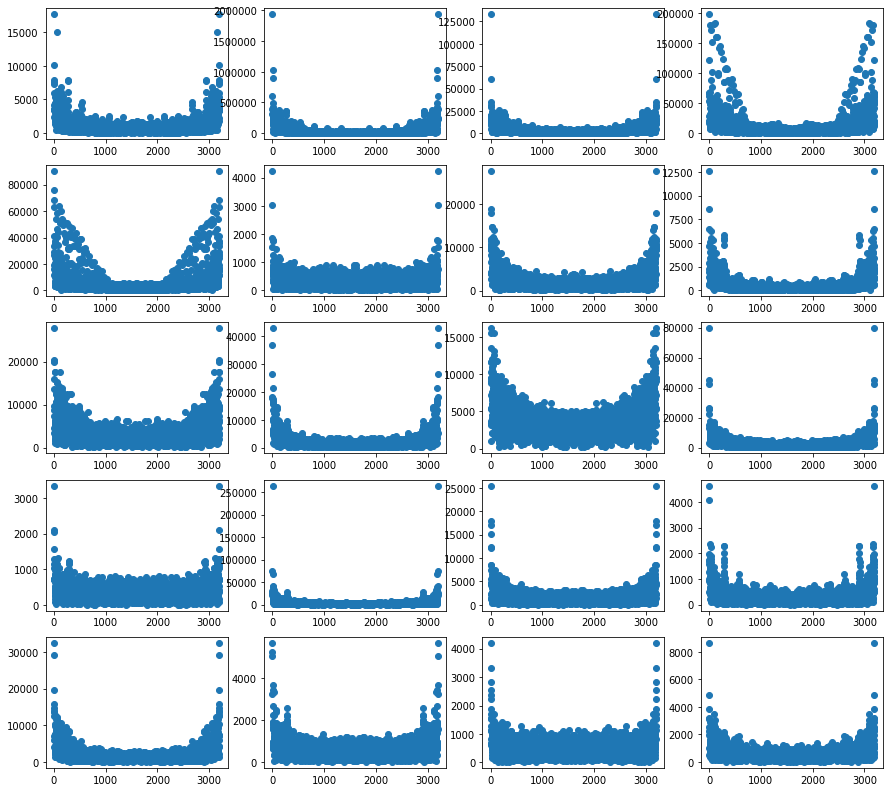

In [152]:
fig = plt.figure(figsize=(15,40))
x = np.array(range(3197))
for i in range(20):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(x,test_smooth.iloc[i,1:])

In [153]:
X_train_smooth = train_smooth.drop('LABEL', axis=1)
y_train_smooth = train_smooth['LABEL'].values
X_test_smooth = test_smooth.drop('LABEL', axis=1)
y_test_smooth = test_smooth['LABEL'].values

/Users/waleedzafar/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waleedzafar/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waleedzafar/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



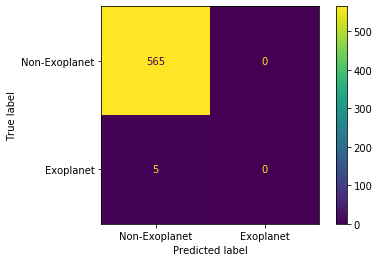

In [154]:
# knn after smote
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=44)
knn.fit(X_train_smooth, y_train_smooth)
preds = knn.predict(X_test_smooth)
print(classification_report(y_test_smooth,preds))
plot_confusion_matrix(knn, X_test_smooth, y_test_smooth, display_labels=['Non-Exoplanet','Exoplanet'])  
plt.show()

In [264]:
from scipy.signal import savgol_filter
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize 

train_fft = np.abs(np.fft.fft(X_train, axis=1))
test_fft = np.abs(np.fft.fft(X_test, axis=1))
train_sav = savgol_filter(train_fft,17,5)
test_sav = savgol_filter(test_fft,17,5)
train_norm = normalize(train_sav)
test_norm = normalize(test_sav)
scaler = RobustScaler()
train_scaled = scaler.fit_transform(train_norm)
test_scaled = scaler.transform(test_norm)


              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       1.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       1.00      0.50      0.50       570
weighted avg       0.99      0.99      0.99       570



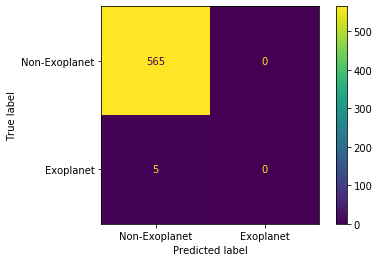

In [171]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=44)
knn.fit(train_scaled, y_train)
preds = knn.predict(test_scaled)
print(classification_report(y_test,preds,zero_division = 1))
plot_confusion_matrix(knn, test_scaled, y_test, display_labels=['Non-Exoplanet','Exoplanet'])  
plt.show()

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       565
           2       0.44      0.80      0.57         5

    accuracy                           0.99       570
   macro avg       0.72      0.90      0.78       570
weighted avg       0.99      0.99      0.99       570



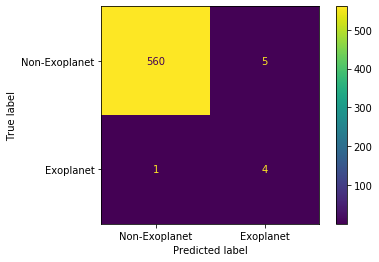

In [263]:
dt = tree.DecisionTreeClassifier()
dt.fit(train_scaled, y_train)
preds = dt.predict(test_scaled)
print(classification_report(y_test,preds,zero_division = 1))
plot_confusion_matrix(dt, test_scaled, y_test, display_labels=['Non-Exoplanet','Exoplanet'])  
plt.show()

## Final Parameters

In [253]:
train_fft = np.abs(np.fft.fft(X_train, axis=1))
test_fft = np.abs(np.fft.fft(X_test, axis=1))
train_sav = savgol_filter(train_fft,21,4)
test_sav = savgol_filter(test_fft,21,4)
train_norm = normalize(train_sav)
test_norm = normalize(test_sav)
scaler = RobustScaler()
train_scaled = scaler.fit_transform(train_norm)
test_scaled = scaler.transform(test_norm)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       1.00      1.00      1.00         5

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570



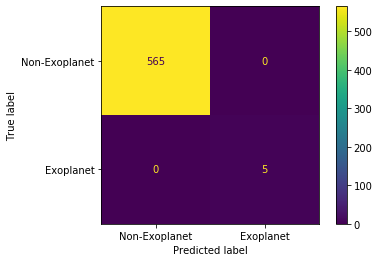

In [255]:
dt = tree.DecisionTreeClassifier(random_state=4)
dt.fit(train_scaled, y_train)
preds = dt.predict(test_scaled)
print(classification_report(y_test,preds,zero_division = 1))
plot_confusion_matrix(dt, test_scaled, y_test, display_labels=['Non-Exoplanet','Exoplanet'])  
plt.show()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5050
           2       1.00      1.00      1.00        37

    accuracy                           1.00      5087
   macro avg       1.00      1.00      1.00      5087
weighted avg       1.00      1.00      1.00      5087



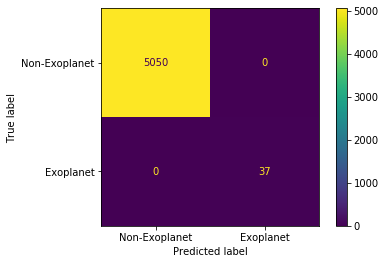

In [256]:
dt = tree.DecisionTreeClassifier(random_state=4)
dt.fit(train_scaled, y_train)
preds_train = dt.predict(train_scaled)
print(classification_report(y_train,preds_train,zero_division = 1))
plot_confusion_matrix(dt, train_scaled, y_train, display_labels=['Non-Exoplanet','Exoplanet'])  
plt.show()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       1.00      0.60      0.75         5

    accuracy                           1.00       570
   macro avg       1.00      0.80      0.87       570
weighted avg       1.00      1.00      1.00       570



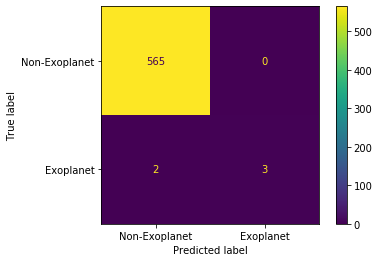

In [246]:
from sklearn import svm
svm = svm.SVC()
svm.fit(train_scaled, y_train)
preds = svm.predict(test_scaled)
print(classification_report(y_test,preds,zero_division = 1))
plot_confusion_matrix(svm, test_scaled, y_test, display_labels=['Non-Exoplanet','Exoplanet'])  
plt.show()

/Users/waleedzafar/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           1       1.00      0.99      1.00       565
           2       0.50      0.60      0.55         5

    accuracy                           0.99       570
   macro avg       0.75      0.80      0.77       570
weighted avg       0.99      0.99      0.99       570



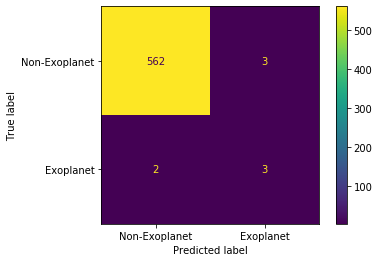

In [213]:
lgr = LogisticRegression()
lgr.fit(train_scaled, y_train)
preds = lgr.predict(test_scaled)
print(classification_report(y_test,preds,zero_division = 1))
plot_confusion_matrix(lgr, test_scaled, y_test, display_labels=['Non-Exoplanet','Exoplanet'])  
plt.show()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       1.00      0.60      0.75         5

    accuracy                           1.00       570
   macro avg       1.00      0.80      0.87       570
weighted avg       1.00      1.00      1.00       570



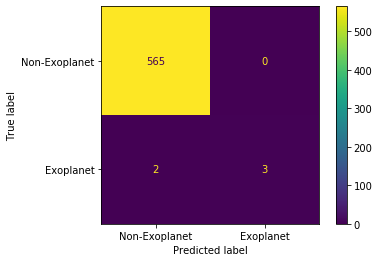

In [232]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, y_train)
preds = knn.predict(test_scaled)
print(classification_report(y_test,preds,zero_division = 1))
plot_confusion_matrix(knn, test_scaled, y_test, display_labels=['Non-Exoplanet','Exoplanet'])  
plt.show()